In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv('Job_placement_Data.csv')

In [3]:
dataset.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [4]:
dataset=dataset.drop(columns=['ssc_board','hsc_board'])

In [5]:
dataset.shape

(215, 11)

In [6]:
dataset.isna().sum()

gender                 0
ssc_percentage         0
hsc_percentage         0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [7]:
dataset.duplicated().sum()

0

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   hsc_percentage       215 non-null    float64
 3   hsc_subject          215 non-null    object 
 4   degree_percentage    215 non-null    float64
 5   undergrad_degree     215 non-null    object 
 6   work_experience      215 non-null    object 
 7   emp_test_percentage  215 non-null    float64
 8   specialisation       215 non-null    object 
 9   mba_percent          215 non-null    float64
 10  status               215 non-null    object 
dtypes: float64(5), object(6)
memory usage: 18.6+ KB


In [9]:
for i in ['status','specialisation','work_experience','undergrad_degree','hsc_subject','gender']:
    print('column ',i,' : ',dataset[i].unique())

column  status  :  ['Placed' 'Not Placed']
column  specialisation  :  ['Mkt&HR' 'Mkt&Fin']
column  work_experience  :  ['No' 'Yes']
column  undergrad_degree  :  ['Sci&Tech' 'Comm&Mgmt' 'Others']
column  hsc_subject  :  ['Commerce' 'Science' 'Arts']
column  gender  :  ['M' 'F']


In [10]:
dataset.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [11]:
#dataset.corr(numeric_only=True)
dataset.corr()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
ssc_percentage,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_percentage,0.511472,1.000000,0.434206,0.245113,0.354823
degree_percentage,0.538404,0.434206,1.000000,0.224470,0.402364
emp_test_percentage,0.261993,0.245113,0.224470,1.000000,0.218055
mba_percent,0.388478,0.354823,0.402364,0.218055,1.000000


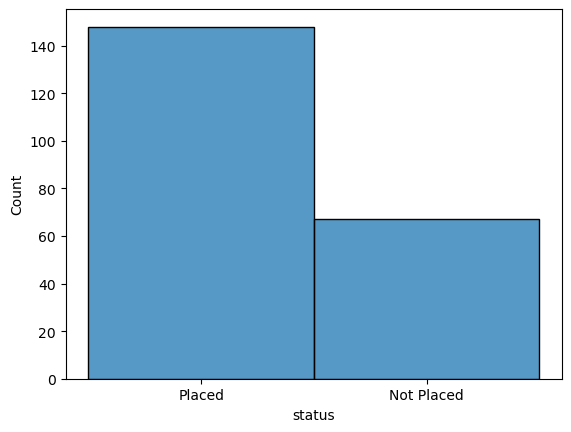

In [12]:
sns.histplot(dataset,x='status');

In [13]:
X = dataset.drop(columns='status',axis=1)
y = dataset['status']

# Enter your code here

In [14]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost

In [15]:
# !pip install xgboost

In [16]:
 # conda install -c conda-forge xgboost=0.6a2

In [17]:
# Split the dataset into Train and Test sets with test_size=25% and random_state=25.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [18]:
X_test.head()# 25%

,gender,ssc_percentage,hsc_percentage,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent
43,M,87.0,87.00,Commerce,68.0,Comm&Mgmt,No,95.00,Mkt&HR,62.90
180,M,65.0,71.50,Commerce,62.8,Comm&Mgmt,Yes,57.00,Mkt&Fin,56.60
34,M,62.0,51.00,Science,52.0,Others,No,68.44,Mkt&HR,62.77
41,F,74.0,63.16,Commerce,65.0,Comm&Mgmt,Yes,65.00,Mkt&HR,69.76
157,M,66.5,62.50,Commerce,60.9,Comm&Mgmt,No,93.40,Mkt&Fin,55.03


In [19]:
X_train.head()# 75%

,gender,ssc_percentage,hsc_percentage,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent
149,M,44.00,58.0,Arts,55.0,Comm&Mgmt,Yes,64.25,Mkt&HR,58.54
179,F,77.80,64.0,Science,64.2,Sci&Tech,No,75.50,Mkt&HR,72.14
134,F,77.44,92.0,Commerce,72.0,Comm&Mgmt,Yes,94.00,Mkt&Fin,67.13
28,M,76.76,76.5,Commerce,67.5,Comm&Mgmt,Yes,73.35,Mkt&Fin,64.15
208,F,43.00,60.0,Science,65.0,Comm&Mgmt,No,92.66,Mkt&HR,62.92


In [20]:
# select all categorical variables
dataset_categorical = dataset.select_dtypes(include=['object'])
dataset_categorical.head()

,gender,hsc_subject,undergrad_degree,work_experience,specialisation,status
0,M,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed


In [21]:
# Apply Label encoder to dataset_categorical
label_encoder = preprocessing.LabelEncoder()
dataset_categorical = dataset_categorical.apply(label_encoder.fit_transform)
dataset_categorical.head()

,gender,hsc_subject,undergrad_degree,work_experience,specialisation,status
0,1,1,2,0,1,1
1,1,2,2,1,0,1
2,1,0,0,0,0,1
3,1,2,2,0,1,0
4,1,1,0,0,0,1


In [22]:
# Concat dataset_categorical with original df
dataset = dataset.drop(dataset_categorical.columns, axis=1)# drop categorical
dataset = pd.concat([dataset, dataset_categorical], axis=1)# concat for dataframe
dataset.head()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender,hsc_subject,undergrad_degree,work_experience,specialisation,status
0,67.00,91.00,58.00,55.0,58.80,1,1,2,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,2,2,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,2,2,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,1,0,0,0,1


In [23]:
# look at column types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ssc_percentage       215 non-null    float64
 1   hsc_percentage       215 non-null    float64
 2   degree_percentage    215 non-null    float64
 3   emp_test_percentage  215 non-null    float64
 4   mba_percent          215 non-null    float64
 5   gender               215 non-null    int64  
 6   hsc_subject          215 non-null    int64  
 7   undergrad_degree     215 non-null    int64  
 8   work_experience      215 non-null    int64  
 9   specialisation       215 non-null    int64  
 10  status               215 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 18.6 KB


In [24]:
# convert target variable status to categorical
dataset['status'] = dataset['status'].astype('category')
dataset['status'].head()

0    1
1    1
2    1
3    0
4    1
Name: status, dtype: category
Categories (2, int64): [0, 1]

In [25]:
dataset['status'].value_counts()

1    148
0     67
Name: status, dtype: int64

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ssc_percentage       215 non-null    float64 
 1   hsc_percentage       215 non-null    float64 
 2   degree_percentage    215 non-null    float64 
 3   emp_test_percentage  215 non-null    float64 
 4   mba_percent          215 non-null    float64 
 5   gender               215 non-null    int64   
 6   hsc_subject          215 non-null    int64   
 7   undergrad_degree     215 non-null    int64   
 8   work_experience      215 non-null    int64   
 9   specialisation       215 non-null    int64   
 10  status               215 non-null    category
dtypes: category(1), float64(5), int64(5)
memory usage: 17.3 KB


In [27]:
# Create Decision Tree classifer object & Print model name
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [28]:
X = dataset.drop(columns='status',axis=1)
y = dataset['status']

In [29]:
# resplitting the data into train and test after Label encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [30]:
# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

In [31]:
predictions = dtc.predict(X_test)
Accuracy = accuracy_score(y_test, predictions)
print('The accuracy of Decision Tree is: ',Accuracy*100,'%')

The accuracy of Decision Tree is:  74.07407407407408 %


In [32]:
print(confusion_matrix(y_test,predictions))

[[13  2]
 [12 27]]


In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.52      0.87      0.65        15
           1       0.93      0.69      0.79        39

    accuracy                           0.74        54
   macro avg       0.73      0.78      0.72        54
weighted avg       0.82      0.74      0.75        54



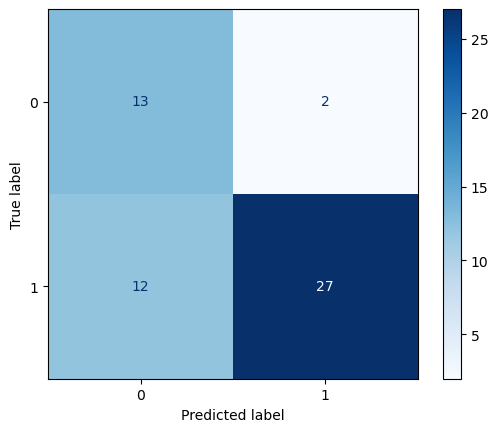

In [34]:
plot_confusion_matrix(dtc, X_test, y_test, cmap='Blues')  
plt.show()

In [35]:
# Use StandardScaler() to improved performance 
Scaler = StandardScaler()
Scaler

StandardScaler()

In [36]:
X =Scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)
dtcS = DecisionTreeClassifier()
dtcS.fit(X_train,y_train)# Learning 
y_pred = dtcS.predict(X_test)# Predictions

In [38]:
comp_result = pd.DataFrame(y_test)
comp_result['predictions']= predictions
comp_result

,status,predictions
43,1,1
180,1,1
34,0,0
41,0,0
157,1,0
19,1,1
123,1,1
176,1,0
78,1,1
75,0,0


In [39]:
predictions = dtcS.predict(X_test)
Accuracy = accuracy_score(y_test, predictions)
print('The accuracy of Decision Tree after standard scaler is: ',Accuracy*100,'%')

The accuracy of Decision Tree after standard scaler is:  74.07407407407408 %


In [40]:
print(confusion_matrix(y_test,predictions))

[[12  3]
 [11 28]]


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.80      0.63        15
           1       0.90      0.72      0.80        39

    accuracy                           0.74        54
   macro avg       0.71      0.76      0.72        54
weighted avg       0.80      0.74      0.75        54



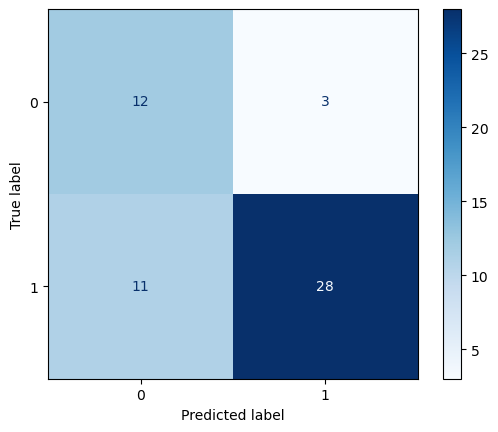

In [42]:
plot_confusion_matrix(dtcS, X_test, y_test, cmap='Blues')  
plt.show()

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
adaboost = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.2).fit(X_train, Y_train)
score = adaboost.score(X_test, Y_test)
score

0.8307692307692308

In [45]:
xgboost = XGBClassifier(n_estimators = 1000, learning_rate = 0.05).fit(X_train, Y_train, early_stopping_rounds = 5, eval_set = [(X_test, Y_test)],verbose = False)
score_xgb = xgboost.score(X_test,Y_test)
score_xgb

0.8615384615384616

In [46]:
# from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [47]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
y_pred = model.predict(X_test)
prediction = [round(value) for value in y_pred ]

In [49]:
accuracy = accuracy_score(y_test, prediction)
print('The accuracy of xgboost after standard scaler is: ',accuracy*100,'%')

The accuracy of xgboost after standard scaler is:  87.03703703703704 %


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80        15
           1       0.97      0.85      0.90        39

    accuracy                           0.87        54
   macro avg       0.84      0.89      0.85        54
weighted avg       0.90      0.87      0.88        54



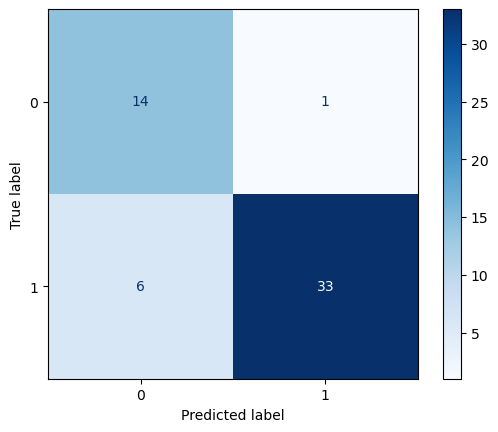

In [52]:
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')  
plt.show()